## Gmartket 베스트 상품 이미지 크롤링

### Gmartket 베스트 상품 이미지 크롤링
* 패션 의류 탑 5 상품 이미지

In [1]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

#타깃이 되는 URL
best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'

#HTML 가져오기
res = requests.get(best_url)

#HTML 파싱하여 객체에 담기
soup = BeautifulSoup(res.content, 'html.parser')

#태그안의 정보 빼기
products = soup.select('div.best-list > ul > li') 

In [2]:
len(products)

100

In [9]:
products[0].select_one('a.itemname').get_text()

'(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈'

In [14]:
img_tag = products[0].select_one('img.lazy')
img_tag

<img alt="(연휴특가)쇼인더룸 가을신상할인 티셔츠/세트/팬츠/빅사이즈" class="lazy" data-original="//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415" height="210" src="//image.gmarket.co.kr/challenge/neo_image/no_image.gif" width="210"/>

In [12]:
img_tag['data-original']

'//gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [15]:
img_tag['src']

'//image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [19]:
'https:'+img_tag['data-original']
# 'https:'+img_tag['src']

'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [20]:
img_url = 'https:'+ img_tag['data-original']
img_url

'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

In [8]:
img_url = 'https:'+ img_tag['src']
img_url

'https://image.gmarket.co.kr/challenge/neo_image/no_image.gif'

In [22]:
## 이미지 다운로드
from urllib.request import urlopen
imgUrl = 'https://gdimg.gmarket.co.kr/1975776752/still/300?ver=2022091415'

index = 0
with urlopen(imgUrl) as f:
    with open('./image/crawl/img'+ str(index +1) + '.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)

## 종합코드

* 베스트 5개 이미지만 저장할 것!

In [40]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

crawl_num = 5   #크롤 갯수

best_url = 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01'
res = requests.get(best_url)
soup = BeautifulSoup(res.content, 'html.parser')
products = soup.select('div.best-list > ul > li') 

for index,_ in enumerate(products):
    if index < crawl_num:
        img_tag = products[index].select_one('img.lazy')
        img_url = 'https:'+ img_tag['data-original']
        pname = products[index].select_one('a.itemname').get_text().replace('/',',')

        from urllib.request import urlopen
        with urlopen(img_url) as f:
            with open(f'./image/crawl/{pname}' + '.jpg','wb') as h: # w - write b - binary
                img = f.read()
                h.write(img)
print("크롤링 끝")

크롤링 끝


### 파일이름에 상품명이 같이 나오도록 바꾸기

* 예) img1.jpg -> img1_겨울 따뜻한 후리스조끼플리스자켓패딩기모바지.jpg

In [23]:

pname = products[index].select_one('a.itemname').get_text().replace('/',',')
from urllib.request import urlopen
with urlopen(img_url) as f:
    with open(f'./image/crawl/{pname}' + '.jpg','wb') as h: # w - write b - binary
        img = f.read()
        h.write(img)











Image Crawling is done


### 카테고리별 베스트 상품 크롤링 자동화

* 패션의류, 신발/잡화, 화장품/헤어, 유아동/출산 .........
* 원하는 만큼 상품 크롤링

#### 자동으로 URL 만들기

* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03
* http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04

> URL을 위의 순서처럼 순서대로 만들려면 어떻게 해야할까?

In [51]:
url=[]
for n in range(1,5):
    url.append(f'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{n:02d}')
url

['http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04']

#### 자동으로 4개의 카테고리 베스트 상품을 크롤링 하세요

In [21]:
from posixpath import dirname
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os

crawl_num = 5

url=[]
for n in range(1,5):
    url.append(f'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{n:02d}')
    
    res = requests.get(url[n-1])
    
    
    soup = BeautifulSoup(res.content, 'html.parser')
    products = soup.select('div.best-list > ul > li') 

    for index,_ in enumerate(products):
        if index < crawl_num:
            img_tag = products[index].select_one('img.lazy')
            img_url = 'https:'+ img_tag['data-original']
            pname = products[index].select_one('a.itemname').get_text().replace('/',',')

            from urllib.request import urlopen
            with urlopen(img_url) as f:
                with open(f'./image/crawl/{n:02d}_{pname}_{index+1}' + '.jpg','wb') as h: # w - write b - binary
                    img = f.read()
                    h.write(img)
    # print("크롤링 끝",n)

---
## 사용자 정의 함수

In [1]:
def makeURL(num):
    url_lst=[]
    for n in range(1,5):
        url_lst.append(f'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G{n:02d}')
    return url_lst
    

In [2]:
makeURL(4)

['http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G01',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G02',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G03',
 'http://corners.gmarket.co.kr/Bestsellers?viewType=G&groupCode=G04']

In [9]:
def getProducts(url):
    import requests
    from bs4 import BeautifulSoup
    
    res = requests.get(url)
    soup = BeautifulSoup(res.content, 'html.parser')
    products = soup.select('div.best-list > ul > li') 
    return products

In [4]:
def getProductName(product):
    
    pname = product.select_one('a.itemname').get_text().replace('/',',')
    
    return pname

In [5]:
def getImageURL(product):
    img_tag = product.select_one('img.lazy')
    img_url = 'https:'+ img_tag['data-original']  
    
    return img_url

In [14]:
def downloadImage(img_url,pname,cate,index):
    from urllib.request import urlopen
    with urlopen(img_url) as f:
        with open(f'./image/crawl/{cate+1:02d}_{pname}_{index+1}' + '.jpg','wb') as h: # w - write b - binary
            img = f.read()
            h.write(img)    

## 종합코드 (함수화)

In [17]:
#URL 만들기
urls = makeURL(4)

for cate,url in enumerate(urls):
    #상품 리스트 가져오기
    products = getProducts(url)
    
    for index, product in enumerate(products):
        if index == 5: break #베스트 상품 5개만 다운받으려고
        
        pname = getProductName(product) #상품이름
        img_url = getImageURL(product)  #이미지 URL
        downloadImage(img_url,pname,cate,index) #이미지 다운
        
print("크롤링 끝~~")
    

크롤링 끝~~


## Pillow(PIL) 모듈 체험

* 파이썬 이미징 라이브러리로서 여러 이미지 파일 포맷을 지원
* 이미지 내부 데이타를 엑세스할 수 있게 하며, 다양한 이미지 처리 기능을 제공

https://pillow.readthedocs.io/en/stable/reference/index.html

http://pythonstudy.xyz/python/article/406-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-Pillow


In [14]:
!pip install Pillow

### 이미지 읽고 쓰기

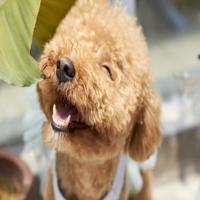

In [15]:
from PIL import Image
# 이미지 열기
tmp = Image.open('./image/dog.jpg')
tmp

In [16]:
from PIL import Image
# 이미지 열기
tmp = Image.open('./image/dog.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(200, 200)


In [17]:
from PIL import Image
# 이미지 열기
fileName='dog'
tmp = Image.open('./image/' + fileName + '.jpg')
 
# 이미지 크기 출력
print(tmp.size)
tmp.close()

(200, 200)


### 이미지 사이즈 조절

In [18]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

# 200x200으로 조절
tmpResize=tmp.resize((100,100))
tmpResize.save('./image/' + fileName + '.jpg')

print('---end ---')
tmp.close()

---end ---


In [33]:
fileName='dog'
tmp=Image.open('./image/' + fileName + '.jpg')

size=300
tmpResize=tmp.resize((size,size))
tmpResize.save('./image/' + str(size) + fileName + '.jpg')
print('---end ---')
tmp.close()

---end ---


### 이미지에 로고 합성
 https://creativeworks.tistory.com/entry/PYTHON-3-Tutorials-41-Combine-Images-Together-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EB%B3%91%ED%95%A9%ED%95%98%EA%B8%B0-like-watermark%EC%9B%8C%ED%84%B0%EB%A7%88%ED%81%AC?category=620431

In [62]:
from PIL import Image

logo=Image.open('./image/top.png')

print(logo.size)

(64, 64)


In [23]:
#area=(0,0,64,64)
p=Image.open('./image/crawl/01_너의지금 20%쿠폰 신상니트 가디건,롱,세트,가을신상,크롭,박스,루즈핏,긴팔_1.jpg')

area=(0,0,logo.width,logo.height)

p.paste(logo,area,logo) #png 파일 배경 투명하게 붙이는 방법


p.save('01_[logo]_너의지금 20%쿠폰 신상니트 가디건,롱,세트,가을신상,크롭,박스,루즈핏,긴팔_1.jpg')
p.close()
logo.close()

## 디렉토리안 파일리스트 가져오기

In [85]:
import os
path_dir='./image/crawl'
fileList=os.listdir(path_dir)
# type(fileList)

## 카테고리별 1등 파일에만 1등 로고합성하기

In [86]:
flist=[]
for find in fileList:
    if '1.jpg' in find:
        flist.append(find)
flist


['01_너의지금 20%쿠폰 신상니트 가디건,롱,세트,가을신상,크롭,박스,루즈핏,긴팔_1.jpg',
 '02_[에스콰이아]30% 에스콰이아 가을준비 F,W 가방 (숄더백,토트,미니백외)_1.jpg',
 '03_[이니스프리](50%+10%) 전품목 빅세일+클렌징폼 선크림 핸드크림 반값_1.jpg',
 '04_[알로앤루]12%중복쿠폰 알로 알퐁소 가을신상오픈_1.jpg']

In [97]:
from PIL import Image

for n in range(len(flist)):
    logo=Image.open('./image/top.png')
    # print(logo.size)

    p=Image.open('./image/crawl/'+flist[n])

    area=(0,0,logo.width,logo.height)

    p.paste(logo,area,logo)

    p.save('[logo]_'+flist[n])
    p.close()
    logo.close()
